## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combo_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combo_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 



In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [6]:
# Checking the number of mice in the clean DataFrame.


## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
summary_stats = combo_data.groupby('Drug Regimen')

# mean, median, variance, standard deviation, and SEM of the tumor volume.
tumor_mean = summary_stats['Tumor Volume (mm3)'].mean()
tumor_median = summary_stats['Tumor Volume (mm3)'].median()
tumor_stdev = summary_stats['Tumor Volume (mm3)'].std()
tumor_sem = summary_stats['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.

summary_df = pd.DataFrame({'Mean': tumor_mean, 
                            'Median': tumor_median,
                            'Standard Deviation': tumor_stdev, 
                            'SEM': tumor_sem})

summary_df

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466
Placebo,54.033581,52.288934,7.821003,0.581331
Propriva,52.322552,50.854632,6.507770,0.512884
Ramicane,40.216745,40.673236,4.846308,0.320955
Stelasyn,54.233149,52.431737,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Data Points for Each Treatment')

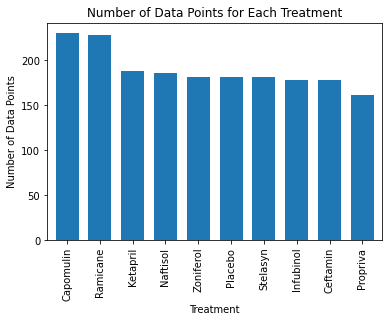

In [17]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

bar_plot = combo_data['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)

bar_plot.set_xlabel("Treatment")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment")

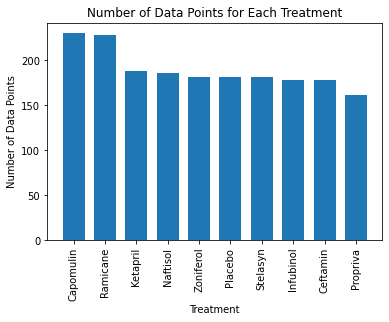

In [18]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

counts = combo_data['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, zorder=3)

# ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

plt.xticks(rotation=90)

# labels
plt.xlabel("Treatment")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Treatment")

plt.show()

Text(0, 0.5, '')

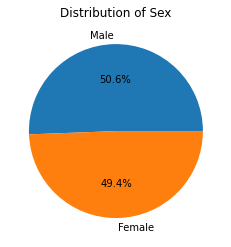

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

sex_of_mice = combo_data['Sex'].value_counts()

pie_plot = sex_of_mice.plot.pie(autopct="%1.1f%%", title='Distribution of Sex')

pie_plot.set_ylabel('')

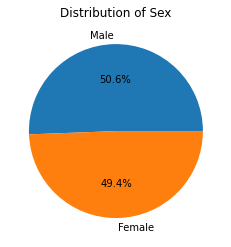

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex_of_mice = combo_data['Sex'].value_counts()


plt.pie(sex_of_mice, labels=sex_of_mice.index.values, autopct="%1.1f%%")
plt.title('Distribution of Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  

# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

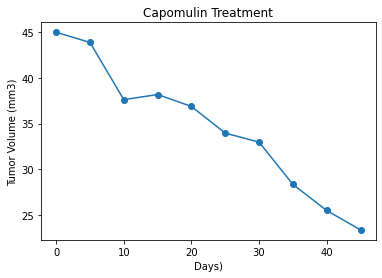

In [29]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mouse = combo_data.loc[combo_data['Mouse ID'] == 's185']

plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

plt.xlabel("Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment")

plt.show()

In [30]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = combo_data.loc[combo_data['Drug Regimen'] == 'Capomulin']




## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
